<a href="https://colab.research.google.com/github/PabloDiosquez/Laboratorio_de_Datos_UBA/blob/main/EstadisticaDescriptiva_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadística descriptiva, visualizaciones y experimentos numéricos

En esta notebook vamos a aprender a trabajar con distribuciones de datos, computar distintos estadísticos tales como la media y la desviación, entre otros, como así también visualizar la distribución a partir de histogramas. Vamos a explorar estos puntos a partir de generar números aleatorios en python con distintas distribuciones.

Por otro lado, generar números aleatorios nos permite jugar un poco y hacer experimentos numéricos que nos permiten entender un poco más resultados teóricos como el teorema central de límite o la ley de grandes números, comparar la performance de distintos coeficientes de correlación y ver la robustez de los observables que cuantificamos ante la presencia de outliers (ver parte 2).

In [ ]:
# Importamos las librerías más usadas, en el camino vemos si necesitamos algo más
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats

#### Breve, brevísimo comentario sobre generar números aleatorios

Antes de ver distribuciones, veamos algo muy sencillo potencialmente útil: generar un único número aleatorio. Decirlo así es una tanto vago, siempre hay que específicar de qué distribución viene dicho número.
A lo largo de esta notebook vamos a ver ejemplos realizados tanto con *numpy* como en *scipy.stats*.

Por ejemplo, muchas veces podríamos querer un número uniformemente distribuido entre 0 y 1 (mediante una transformación lineal podemos generarlo en otro intervalo):




In [ ]:
rand = np.random.random()
print(rand)

0.3532224522277748


Otra cosa muy común es generar números con una distribución normal de media $\mu$ y desviación $\sigma$:

In [ ]:
mu = 0.00
sigma = 1.00

randn = np.random.normal(loc = mu, scale = sigma)
print(randn)

0.5343418390989064


##### Semilla

Los números aleatorios generados por una computadora no son en realidad tan aleatorios, sino que vienen de un algoritmo que vilmente nos hace creer que sí. Sea como sea, éste recibe una condición inicial llamada semilla y a partir de ella genera el resto de los números. Si fijamos la semilla antes de cada experimento numérico podemos reproducir exactamente la misma salida de números aleatorios. Para fijar en numpy se hace con:
~~~
np.random.seed(semilla)
~~~
donde semilla es un número cualquiera.

In [ ]:
# Ver que si la línea de la semilla está descomentada el resultado es siempre el mismo.
# Al revés, si no fijamos la semilla, cada vez que comencemos esta notebook los resultados serán distintos.

np.random.seed(123457)
print(np.random.random())
print(np.random.normal())

0.4347450610414807
-0.003031385471098537


Conclusión, fijando la semilla todos los resultados que vienen a continuación se reproducen en forma exacta. Fijar la semilla en numpy también lo hace para las rutinas de scipy.

#### Librería [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

Dentro de scipy tenemos el modulo *stats* que tiene muchas funciones para trabajar con distintas distribuciones, generar números aleatorios de estas y cuantificar diferentes observables. Lo bueno es que una vez que aprendemos a llamar a los distintos métodos de una distribución, la extensión a otras es inmediata.

##### Distribuciones de variable aleatoria continua

In [ ]:
# Cambiar la distribucion aquí y la sintaxis de lo que sigue es la misma

distribucion = stats.norm(loc = 0.00, scale = 1.00) #  Distribución normal
# distribucion = stats.expon(scale = 2.00) #  Distribución exponencial
# distribucion = stats.uniform(scale = 3.00) #  Distribución uniforme

# Generar 10 numeros aleatorios con la distribucion dada (.rvs random variates)
muestra = distribucion.rvs(size = 10)
print('Muestra: {}'.format(muestra))

Muestra: [-0.33496225 -0.8534663   0.51405265 -0.77269685 -2.105874    0.54902703
 -1.69221803  0.11964082  0.32059094  1.17849406]


Cuantil 99%: [-2.5758293035489004, 2.5758293035489004]


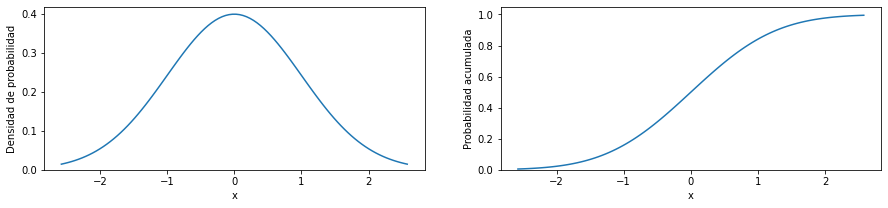

In [ ]:
"""
Gráficos de la función densidad y acumulada de probabilidad
"""
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,3))

# Rango de la variable aleatoria, tomamos un cuantil del 99% 
cuantil_99 = distribucion.interval(0.99)
print('Cuantil 99%: [{}, {}]'.format(*cuantil_99))

# Rango de la variable x 
x = np.linspace(cuantil_99[0], cuantil_99[1], 100)

# .pdf probability density function
densidad_proba = distribucion.pdf(x)
ax[0].plot(x, densidad_proba)
ax[0].set_xlabel('x')
ax[0].set_ylabel('Densidad de probabilidad')
ax[0].set_ylim(bottom = 0)

# .cdf cumulative density function
proba_acumulada = distribucion.cdf(x)
ax[1].plot(x, proba_acumulada)
ax[1].set_xlabel('x')
ax[1].set_ylabel('Probabilidad acumulada')
ax[1].set_ylim([0, 1.05])

plt.show()

**Observación**: el método .interval(alpha) permite tomar un intervalo que contenga un %alpha de la masa de probabilidad. Si lo piensan, al menos para una variable continua, hay infinitos intervalos de este tipo. Scipy no lo aclara, pero lo más probable es que esté tomando el intervalo más angosto, es decir, el que se queda con un %alpha de la masa de probabilidad, pero que a la vez es el más denso.
Para captar un cuantil específico, usar el método distribucion.ppf(q), donde q puede ser por ejemplo [0.05, 0.95] para captar el cuantil 90% central.

##### Distribuciones de variable aleatoria discreta

Muestra: [1 2 1 1 3 2 1 1 3 0]
Cuantil 99%: [0.0, 6.0]


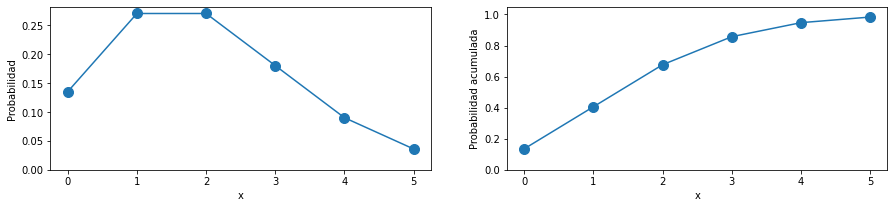

In [ ]:
# Cambiar la distribucion aquí y la sintaxis de lo que sigue es la misma

#distribucion = stats.binom(n = 10, p = 0.25) # Distribucion binomial
distribucion = stats.poisson(mu = 2.00) # Distribucion de Poisson

# Muestra de 10 numeros aleatorios (.rvs random variates)
muestra = distribucion.rvs(size = 10)
print('Muestra: {}'.format(muestra))

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,3))

# Rango de la variable x
cuantil_99 = distribucion.interval(0.99)
print('Cuantil 99%: [{}, {}]'.format(*cuantil_99))

x = range(int(cuantil_99[0]), int(cuantil_99[1]))

# .pmf probability mass function
masa_proba = distribucion.pmf(x)
ax[0].plot(x, masa_proba, '.-', markersize = 20)
ax[0].set_xlabel('x')
ax[0].set_ylabel('Probabilidad')
ax[0].set_ylim(bottom = 0.00)

# .cdf cumulative density function
proba_acumulada = distribucion.cdf(x)
ax[1].plot(x, proba_acumulada, '.-', markersize = 20)
ax[1].set_xlabel('x')
ax[1].set_ylabel('Probabilidad acumulada')
ax[1].set_ylim([0, 1.05])

plt.show()

## Generación de números aleatorios e histogramas 

Acá comienza oficialmente la práctica de estadística descriptiva.
Lo que vamos a hacer a continuación es simular una situación con la que nos vamos a encontrar día a día: tenemos un conjunto de datos y queremos representar gráficamente cómo se distribuyen y reportar ciertas medidas que nos den información y caractericen dicha distribución.

Por el momento vamos a trabajar con un conjunto de datos ficticios, tomados de un generador de números aleatorios de una distribución conocida.

In [ ]:
# Generemos 1000 datos dados por una distribucion normal
# Por los valores elegidos podría representar la altura de un conjunto de personas adultas.

N = 1000
muestra = stats.norm.rvs(loc = 1.75, scale = 0.15, size = N)
print(muestra)

[1.71421443 1.90203931 1.66822853 1.50221392 1.9845445  1.81483355
 1.73977975 1.74403353 1.81316724 1.43751162 2.16668511 1.74096896
 1.71576747 1.90469555 1.45132579 1.85659769 1.53324445 1.61597207
 1.80688297 1.6853917  1.49371032 1.83323854 1.58557205 1.78745203
 1.50983423 1.75958766 1.72412409 1.77148947 1.83381425 1.84815742
 1.56181614 1.59142418 1.85541536 1.57338018 1.83415018 1.6887917
 1.6338888  1.83436274 1.67747986 1.66972057 1.66866021 1.86874551
 1.71252562 1.57620786 1.97618612 1.72540174 1.55258952 1.8791503
 1.62893149 1.76661881 1.84351863 1.94799727 1.78372644 1.93666541
 1.86520819 1.66866178 1.71198969 1.97091873 1.94805772 1.92994602
 1.76717763 1.41708918 1.63023436 1.69754853 1.61610798 1.76652535
 1.83934968 1.85724983 1.95280196 2.12958893 1.73552235 1.83062236
 1.59609585 1.58362839 1.92138163 1.70733427 1.81196809 1.86132258
 1.75596874 1.52510375 1.77247779 1.67309802 2.02959358 1.95417546
 1.7072782  1.64378316 1.92901362 1.84728645 1.79266693 1.769060

¿Cómo comenzamos a caracterizar la distribución de datos? Representandolos gráficamente mediante un histograma. Un histograma básico simplemente cuenta la cantidad de veces que la variable aleatoria cae dentro del intervalo definido por cada *bin*:

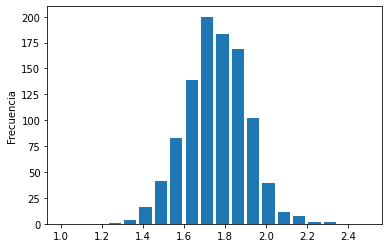

In [ ]:
# Los parámetros que seteo en principio son:
# - Número de bins
# - Rango de los datos que voy a representar (sin especificar nada, toma el mínimo y el máximo)
# - rwidth es solo para visualizar, en vez de dibujar toda la barra, la angosta un poquito
plt.hist(muestra, bins = 20, range = [1.00, 2.50], rwidth = 0.80)
plt.ylabel('Frecuencia')
plt.show()

Ya un histograma nos dá una buena idea de cómo se distribuyen los datos. Sin embargo, la visualización puede ser engañosa, por lo que está bueno ver cómo se modifica la distribución al variar el número de bins.

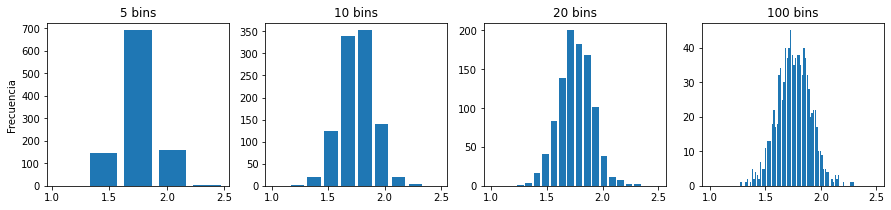

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 3))
fig_index = 0

# Barro en número de bins
for nbins in [5, 10, 20, 100]:

  ax[fig_index].hist(muestra, bins = nbins, range = [1.00, 2.50], rwidth = 0.80)
  ax[fig_index].set_title('{} bins'.format(nbins))
  fig_index += 1

ax[0].set_ylabel('Frecuencia')
plt.show()

#### Normalización y comparación con distribución teórica

Muchas veces vamos a querer comparar la distribución de nuestros datos con alguna distribución teórica (si tiene parámetros, quizás inferidos de la misma muestra, pero eso ya se va de tema). Como toda distribución está normalizada, para comparar con un histograma este mismo también tiene que estarlo. Esto significa que el área que cubren los bins es igual a 1.

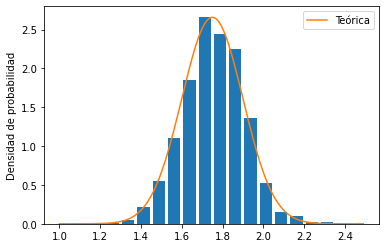

In [ ]:
# Density = True -> histograma normalizado
plt.hist(muestra, bins = 20, range = [1.00, 2.50], rwidth = 0.80, density = True)

# Lo comparamos con la distribución teórica (esto es trampa, es muy probable que nunca la sepamos)
x = np.arange(1.00, 2.50, 0.01)
plt.plot(x, stats.norm.pdf(x, loc = 1.75, scale = 0.15), label = 'Teórica')

plt.ylabel('Densidad de probabilidad')
plt.legend(loc = 'best')
plt.show()

Por otro lado, podemos estudiar la distribución acumulada:

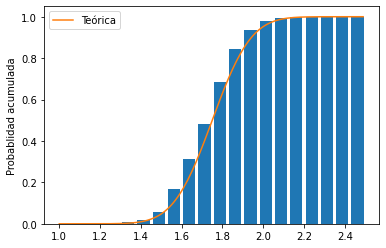

In [ ]:
# Cumulative = True -> acumulada
plt.hist(muestra, bins = 20, range = [1.00, 2.50], rwidth = 0.80, density = True, cumulative = True)

x = np.arange(1.00, 2.50, 0.01)
plt.plot(x, stats.norm.cdf(x, loc = 1.75, scale = 0.15), label = 'Teórica')

plt.ylabel('Probablidad acumulada')
plt.legend(loc = 'best')
plt.show()

#### Observables estadísticos

Además de la visualización, otra forma de cuantificar la distribución es mediante el cálculo de ciertos observables tales como: 

- Media $ \bar X = \frac{1}{N} \sum_i^N X_i $

- Varianza $S^2 = \frac{1}{N-1} \sum_i^N (X_i - \bar X)^2$

- Desviación $S = \sqrt{S^2}$

- Mediana $m$ / $P(X \leq m) = 0.5$

- $\alpha$-cuantil: $c$ / $P(X \leq c) = \alpha$

In [ ]:
# Cálculo de los observables con numpy

media = np.mean(muestra)
varianza = np.var(muestra)
desviacion = np.std(muestra)

mediana = np.median(muestra)
cuartiles = np.quantile(muestra, [0.25, 0.50, 0.75])

print('Media = {:.3f}'.format(media))
print('Desviacion = {:.3f}'.format(desviacion))
print('Varianza = {:.3f}'.format(varianza))

print('Mediana = {:.3f}'.format(mediana))
print('Cuartiles 25%, 50%, 75% = {:.3f}, {:.3f}, {:.3f}'.format(*cuartiles))

Media = 1.757
Desviacion = 0.150
Varianza = 0.023
Mediana = 1.759
Cuartiles 25%, 50%, 75% = 1.657, 1.759, 1.858


Los cuantiles dividen nuestros datos en la cantidad que le especifiquemos. Por ejemplo, la mediana es el punto donde la mitad de los datos son mayores (o menores) o iguales a esta.
Si los cuantiles se refieren al 25%, 50% y 75%, se denominan cuartiles. El cuantil del 50% es exactamente igual a la mediana.

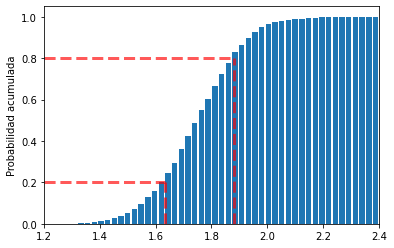

In [ ]:
### Visualizacion de los cuantiles
plt.hist(muestra, bins = 50, range = [1.2, 2.4], density = True, cumulative = True, rwidth = 0.80)

# Cambiar aqui lo cuantiles que se quieran visualizar
for c in [0.20, 0.80]:

  plt.hlines(y = c, xmin = 1.2, xmax = np.quantile(muestra, c), linestyle = '--', color = 'r', alpha = 0.65, linewidth = 3)
  plt.vlines(x = np.quantile(muestra, c), ymin = 0.00, ymax = c, linestyles= '--', color = 'r', alpha = 0.65, linewidth = 3)

plt.ylabel('Probabilidad acumulada')
plt.ylim([0.00, 1.05])
plt.xlim([1.2, 2.4])
plt.show()

#### Otras distribuciones de variables aleatorias continuas

Veamos un poco datos generados con otras distribuciones, representemos en histogramas y calculemos los distintos observables.

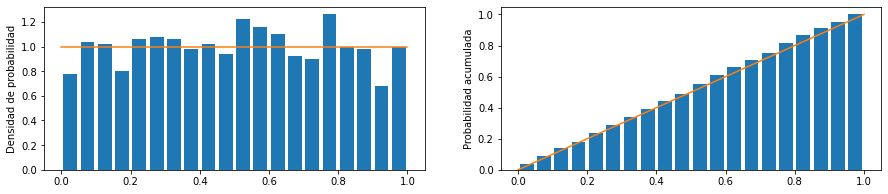

Media = 0.501
Desviacion = 0.280
Mediana = 0.509
90% central = [0.065 - 0.950]


In [ ]:
# Distribucion uniforme entre 0 y 1
distribucion = stats.uniform()

# Muestra de numeros aleatorios
N = 1000
muestra = distribucion.rvs(size = N)

# Rango de la variable x 
x = np.arange(0.00, 1.01, 0.01)

fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (15, 3))

# Histograma de los datos  
ax[0].hist(muestra, bins = 20, range = [0, 1], rwidth = 0.8, density = True)

# Densidad de probabilidad teórica
ax[0].plot(x, distribucion.pdf(x))
ax[0].set_ylabel('Densidad de probabilidad')

# Histograma acumulado de los datos  
ax[1].hist(muestra, bins = 20, range = [0, 1], rwidth = 0.8, cumulative = True, density = True)

# Probabilidad acumulada teórica
ax[1].plot(x, distribucion.cdf(x))
ax[1].set_ylabel('Probabilidad acumulada')
  
plt.show()

print('Media = {:.3f}'.format(np.mean(muestra)))
print('Desviacion = {:.3f}'.format(np.std(muestra)))
print('Mediana = {:.3f}'.format(np.median(muestra)))
print('90% central = [{:.3f} - {:.3f}]'.format(*np.quantile(muestra, [0.05, 0.95])))

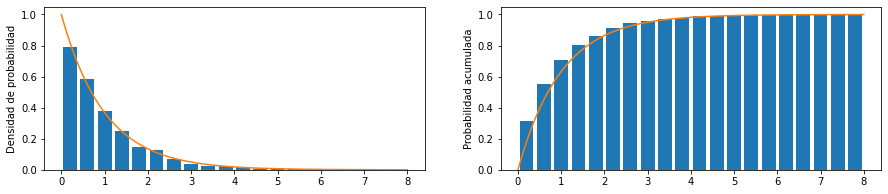

Media = 1.004
Desviacion = 0.996
Mediana = 0.721
90% central = [0.051 - 3.036]


In [ ]:
# Distribucion exponencial
distribucion = stats.expon()

# Muestra de numeros aleatorios
N = 1000
muestra = distribucion.rvs(size = N)

# Rango de la variable x 
x = np.arange(0.00, 8.01, 0.01)

fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (15, 3))

# Histograma de los datos  
ax[0].hist(muestra, bins = 20, range = [0, 8], rwidth = 0.8, density = True)

# Densidad de probabilidad teórica
ax[0].plot(x, distribucion.pdf(x))
ax[0].set_ylabel('Densidad de probabilidad')

# Histograma acumulado de los datos  
ax[1].hist(muestra, bins = 20, range = [0, 8], rwidth = 0.8, cumulative = True, density = True)

# Probabilidad acumulada teórica
ax[1].plot(x, distribucion.cdf(x))
ax[1].set_ylabel('Probabilidad acumulada')
  
plt.show()

print('Media = {:.3f}'.format(np.mean(muestra)))
print('Desviacion = {:.3f}'.format(np.std(muestra)))
print('Mediana = {:.3f}'.format(np.median(muestra)))
print('90% central = [{:.3f} - {:.3f}]'.format(*np.quantile(muestra, [0.05, 0.95])))

#### Variables discretas 

Tener presente la [documentación](https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions) de scipy para variables discretas para ver algunos cambios sútiles respecto de las de variables continuas (por ejemplo, el cambio del método .pdf() por .pmf()).



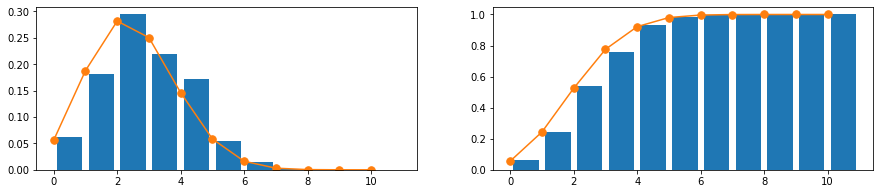

Media = 2.480
Desviacion = 1.361
Mediana = 2.000
90% central = [0.000 - 5.000]
Moda: 2 - freq: 294


In [ ]:
# Distribucion binomial
distribucion = stats.binom(n = 10, p = 0.25)

# Muestra de numeros aleatorios
N = 1000
muestra = distribucion.rvs(size = N)

# Rango de la variable x 
x = range(0, 11)

fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (15, 3))

# Histograma de los datos  
ax[0].hist(muestra, bins = 11, range = [0, 11], rwidth = 0.8, density = True)

# Masa de probabilidad teórica (notar el cambio aquí respecto de las distribuciones continuas)
ax[0].plot(x, distribucion.pmf(x), '.-', markersize = 15)

# Histograma acumulado de los datos  
ax[1].hist(muestra, bins = 11, range = [0, 11], rwidth = 0.8, cumulative = True, density = True)

# Probabilidad acumulada teórica
ax[1].plot(x, distribucion.cdf(x), '.-', markersize = 15)
  
plt.show()

print('Media = {:.3f}'.format(np.mean(muestra)))
print('Desviacion = {:.3f}'.format(np.std(muestra)))
print('Mediana = {:.3f}'.format(np.median(muestra)))
print('90% central = [{:.3f} - {:.3f}]'.format(*np.quantile(muestra, [0.05, 0.95])))

# Para variables discretas podemos calcular la moda
print('Moda: {} - freq: {}'.format(stats.mode(muestra)[0][0], stats.mode(muestra)[1][0]))

Como otro ejemplo de distribución discreta se puede estudiar la distribución de Poisson.

#### Atajos en Numpy y Pandas para estadística descriptiva

Si nuestros datos están en un array de numpy o bien un dataframe en pandas, estos objetos tienen métodos para calcular rápidamente ciertos observables.

In [ ]:
# Array de numpy 
A = np.array([[1, 2, 3, 3], [3, 1, 3, 9], [0, 0, 1, 2]])

# Observables por fila o columnas
print('Media: {}'.format(A.mean(axis = 0)))
print('Desviacion: {}'.format(A.std(axis = 0)))

Media: [1.33333333 1.         2.33333333 4.66666667]
Desviacion: [1.24721913 0.81649658 0.94280904 3.09120617]


In [ ]:
# Histrogramas

data = np.random.normal(loc = 0.00, scale = 1.00, size = 1000)
freq, bin_limits = np.histogram(data, bins = 10)

print('Frecuencia por bin: {}'.format(freq))
print('Límite de los bins: {}'.format(bin_limits))

Frecuencia por bin: [  2  25  73 155 253 229 168  67  20   8]
Límite de los bins: [-3.14157849 -2.51834675 -1.89511501 -1.27188327 -0.64865153 -0.02541978
  0.59781196  1.2210437   1.84427544  2.46750718  3.09073892]


Media:
x    2.999271
y    2.097894
z    7.600000
dtype: float64
Desviacion:
x    0.991073
y    2.299977
z    1.370689
dtype: float64
90% central:
             x         y     z
0.50  2.945449  1.367255  8.00
0.95  4.522569  5.704590  9.05
Mediana:
x    2.945449
y    1.367255
z    8.000000
dtype: float64
Moda de la variable discreta: 
0    8
dtype: int64


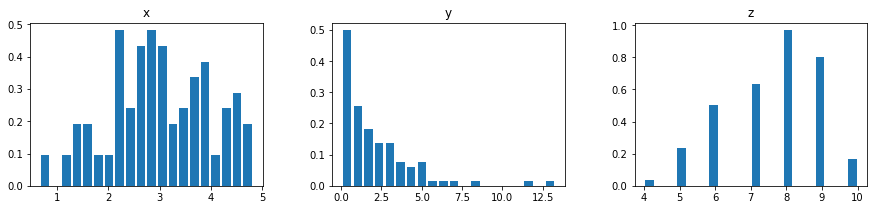

In [ ]:
# Atajos en pandas 

import pandas as pd 

dataframe = pd.DataFrame()
dataframe['x'] = np.random.normal(loc = 3.00, scale = 1.00, size = 100)
dataframe['y'] = np.random.exponential(scale = 2.00, size = 100)
dataframe['z'] = np.random.binomial(n = 10, p = 0.75, size = 100)

print('Media:')
print(dataframe.mean())

print('Desviacion:')
print(dataframe.std())

print('90% central:')
print(dataframe.quantile([0.5, 0.95]))

print('Mediana:')
print(dataframe.median())

print('Moda de la variable discreta: ')
print(dataframe['z'].mode())

# Histogramas 
fig, ax = plt.subplots(1, 3, figsize = (15, 3))
dataframe.hist(ax = ax, bins = 20, rwidth = 0.8, grid = False, cumulative = False, density = True)
plt.show()

### Algunos comentarios finales

#### Log-normal y power-law

Muchas veces los histogramas de datos que provengan de una log-normal o de una power-law pueden confundirse al presentar, por ejemplo, una gran probabilidad de que la variable aleatoria sea cercana a 0, al mismo tiempo de una probabilidad baja, pero no nula, para valores altos (lo que se denomina a veces como *cola pesada*).

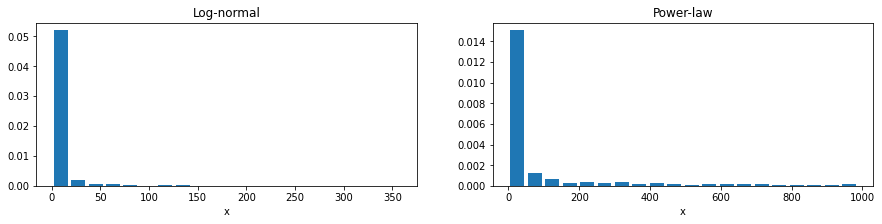

In [ ]:
# Histogramas log-normal y power-law
distribucion_lognormal = stats.lognorm(s = 2.00)
distribucion_powerlaw = stats.powerlaw(0.10, scale = 1000)

muestra_lognormal = distribucion_lognormal.rvs(size = 1000)
muestra_powerlaw = distribucion_powerlaw.rvs(size = 1000)

fig, ax = plt.subplots(1, 2, figsize = (15, 3))
ax[0].hist(muestra_lognormal, bins = 20, density = True, rwidth = 0.80)
ax[0].set_xlabel('x')
ax[0].set_title('Log-normal')
ax[1].hist(muestra_powerlaw, bins = 20, density = True, rwidth = 0.80)
ax[1].set_xlabel('x')
ax[1].set_title('Power-law')
plt.show()

Sin embargo son dos distribuciones muy distintas: mientras la log-normal tiene una escala bien definida (es decir, sabemos a partir de qué valor las probabilidades de que ocurran valores mayores o menores son prácticamente nulas), una powerlaw puede presentar eventos extremos con una probabilidad no despreciable.

Una solución para ver sus particularidades es realizar los histogramas en la escala log-log. Para simplicidad, lo que hacemos es hacer el histograma para el logaritmo de los datos y a su vez graficar el eje $y$ en escala logarítmica (otra solución creo más compleja es hacer un bineo logarítmico, bines más finos para valores bajos y bines más anchos para valores altos).

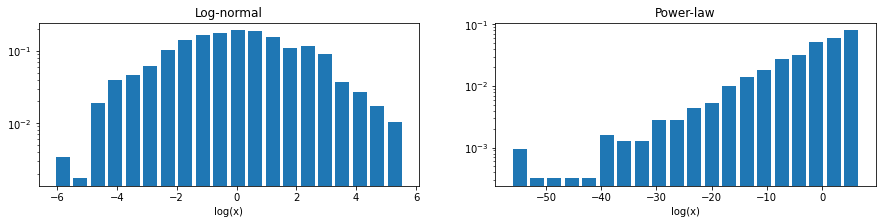

In [ ]:
# Histrogramas log-log

fig, ax = plt.subplots(1, 2, figsize = (15, 3))
ax[0].hist(np.log(muestra_lognormal), bins = 20, density = True, rwidth = 0.80, log = True)
ax[0].set_xlabel('log(x)')
ax[0].set_title('Log-normal')

ax[1].hist(np.log(muestra_powerlaw), bins = 20, density = True, rwidth = 0.80, log = True)
ax[1].set_xlabel('log(x)')
ax[1].set_title('Power-law')

plt.show()

Esto nos muestra dos cosas:
- La log-normal es prácticamente idéntica a una distribución normal viendo todo en escala logarítmica (en realidad, si $x$ es distribuído por una log-normal, entonces $log(x)$ está normalmente distribuído).
- Por otro lado, un distintivo de las distribuciones power-law es que en escala log-log presentan una gráfico lineal (si $P(x) \sim x^\nu$ entonces $log(P(x)) \sim \nu log(x)$).

La distinción es importante porque las power-law son conocidas también como leyes libre de escala. Teóricamente no tienen una dispersión bien definida (depende en realidad del exponente de la distribución) y por lo tanto carecen de una escala con la cual comparar la distancia al valor medio.

#### Normal multivariada

Es importante mencionar que lamentablemente (o por suerte) no todo en la vida es unidimensional y por supuesto existen distribuciones de dos o más variables. Un ejemplo típico es una [normal multivariada](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal_multivariada), que es la generalización de la distribución normal a varias dimensiones.

Para el caso de dos variables estandarizadas, la función densidad es: $$f(x_1, x_2) = \frac{1}{2\pi |\Sigma|^{1/2}} e^{-\frac{1}{2} \bar x^T \Sigma^{-1} \bar x}$$
donde $\bar x = (x_1, x_2)$ y $\Sigma = \Big(\begin{matrix} 1 & \rho\\
\rho & 1 \end{matrix}\Big)$. 

Lo interesante de esta distribución es que el coeficiente de correlación $\rho$ aparece explícitamente es la función densidad, análogo a como aparecen los valores medios y desviaciones en la normal. Esta sería entonces una de las formas más sencillas de crear variables correlacionadas.

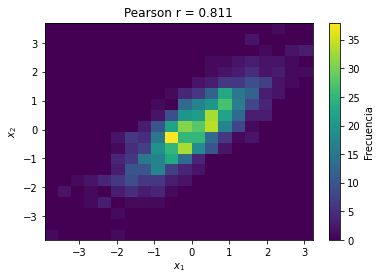

In [ ]:
### Distribuciones multivariadas

# Coeficiente de correlacion
corr_x12 = 0.80

distribucion = stats.multivariate_normal(mean = [0.00, 0.00], cov = np.array(([1.00, corr_x12], [corr_x12, 1.00])))
muestra = distribucion.rvs(size = 1000) 

# Histograma 2D, notar que la muestra tiene dos columnas
plt.hist2d(muestra[:,0], muestra[:,1], bins = 20)

# Calculamos la correlacion de Pearson de los datos a modo de chequeo
plt.title('Pearson r = {:.3f}'.format(stats.pearsonr(muestra[:,0], muestra[:,1])[0]))

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.colorbar(label = 'Frecuencia')
plt.show()